In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 



In [5]:
df=pd.read_csv('D:\Machine Learning\\files\\Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [338]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [339]:
df.drop(columns='customerID',inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Handle missing values

In [340]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [341]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [342]:
df[df['TotalCharges'].isnull()].index.tolist()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [343]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [344]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [345]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

### 26.6% of Custmer left to anther company 
### We have impalanced data

<AxesSubplot:xlabel='Churn', ylabel='count'>

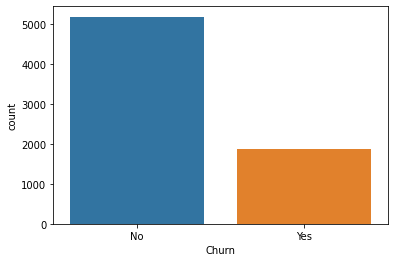

In [346]:
sns.countplot(x=df['Churn'],data=df)

In [347]:
(df['Churn']=='Yes').value_counts()

False    5174
True     1869
Name: Churn, dtype: int64

### Customer are 45.5% female and 50.5% male
### 26.4% of Male left
### 26.9 of Female left 

<AxesSubplot:xlabel='Churn', ylabel='count'>

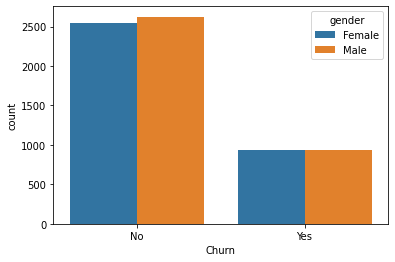

In [348]:
sns.countplot(x=df['Churn'],hue=df['gender'],data=df)

In [349]:
(df['gender']=='Female').value_counts()

False    3555
True     3488
Name: gender, dtype: int64

### 19.66% of Partner left 
### 32.9% of NoPartner left 
#### it make sence people who Not a partner is easy to leave

<AxesSubplot:xlabel='Churn', ylabel='count'>

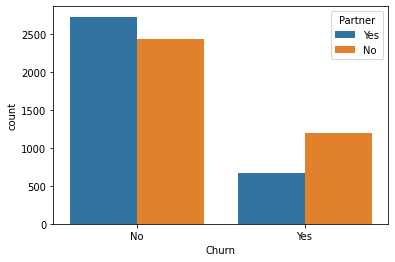

In [350]:
sns.countplot(x=df['Churn'],hue=df['Partner'],data=df)

In [351]:
((df['Churn']=='Yes')&(df['Partner']=='No')).value_counts()

False    5843
True     1200
dtype: int64

In [352]:
((df['Churn']=='Yes')&(df['Partner']=='Yes')).value_counts()

False    6374
True      669
dtype: int64

In [353]:
(df['Partner']=='Yes').value_counts()

False    3641
True     3402
Name: Partner, dtype: int64

### 42.7% of Month-to-Month lift
### 11.27% of One Year lift
### 2.8% of Two Year lift

<AxesSubplot:xlabel='Contract', ylabel='count'>

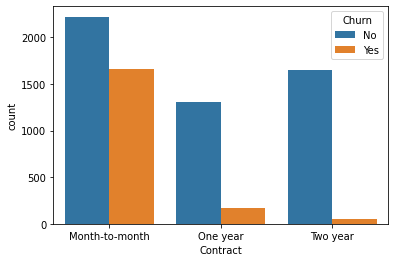

In [355]:
sns.countplot(x=df['Contract'],hue=df['Churn'],data=df)

In [356]:
(df['Contract']).value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [9]:
((df['Churn']=='Yes')&(df['Contract']=='Month-to-month')).value_counts()

False    5388
True     1655
dtype: int64

### 41.8% of Customer useing Fiber optic leave 
### 18.95% of Customer use DSL leave
### 7.4% of Customer Do not leave

<AxesSubplot:xlabel='InternetService', ylabel='count'>

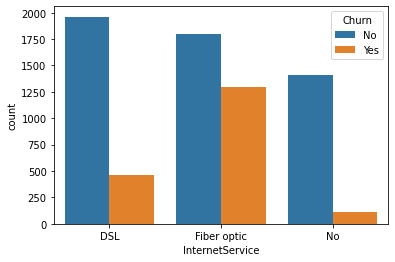

In [358]:
sns.countplot(x=df['InternetService'],hue=df['Churn'],data=df)

In [11]:
((df['Churn']=='Yes')&(df['InternetService']=='No')).value_counts()

False    6930
True      113
dtype: int64

In [360]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

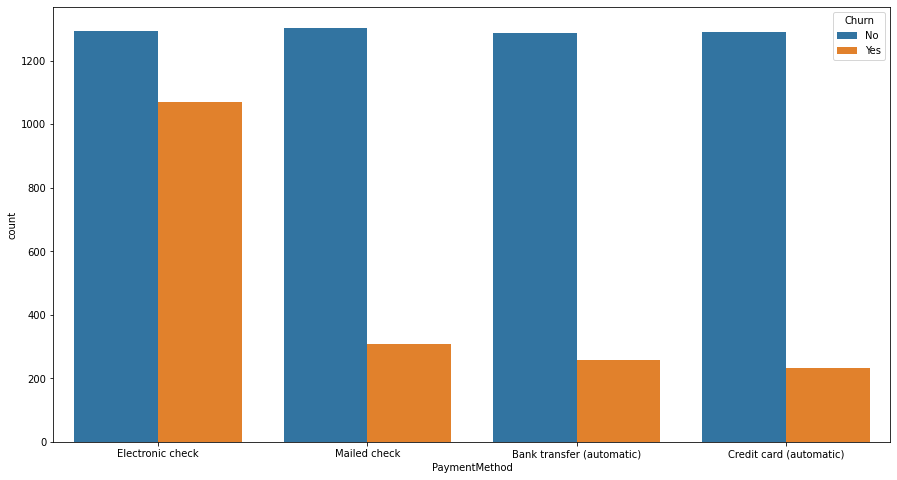

In [13]:
plt.figure(figsize=[15,8])
sns.countplot(x=df['PaymentMethod'],hue=df['Churn'],data=df)

In [362]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [17]:
((df['Churn']=='Yes')&(df['PaymentMethod']=='Bank transfer (automatic)')).value_counts()

False    6785
True      258
dtype: int64

### 15.4% of depndents leave the compeny 
### 31.7% of Not dependent leave

<AxesSubplot:xlabel='Churn', ylabel='count'>

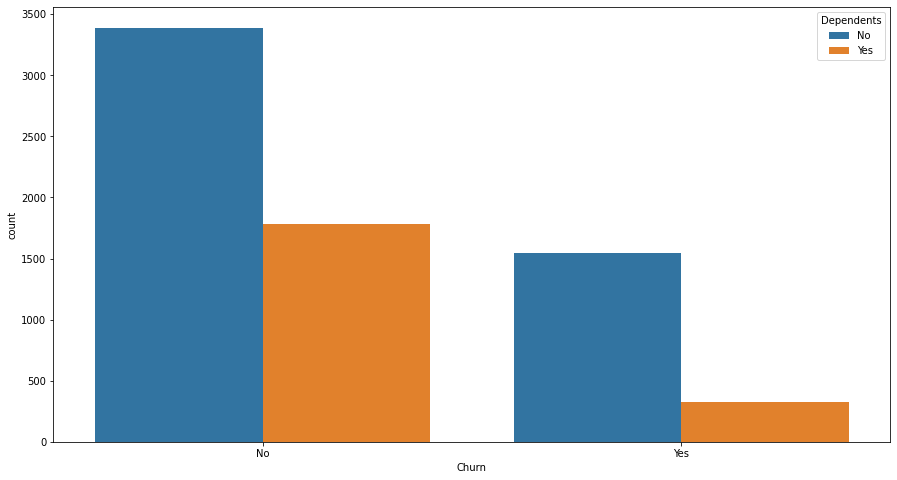

In [364]:
plt.figure(figsize=[15,8])
sns.countplot(x=df['Churn'],hue=df['Dependents'],data=df)

In [365]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [18]:
((df['Dependents']=='Yes')&(df['Churn']=='Yes')).value_counts()

False    6717
True      326
dtype: int64

### 41.68% of Senior Citizen leave The Compeny
### 23.6% of Not Senior Citizen leave the Compeny

<AxesSubplot:xlabel='Churn', ylabel='count'>

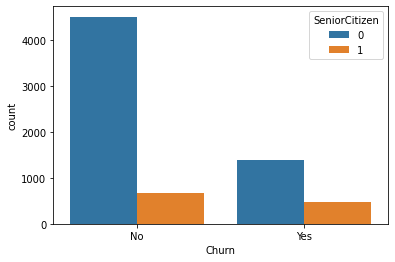

In [19]:
#plt.figure(figsize=[15,8])
sns.countplot(x=df['Churn'],hue=df['SeniorCitizen'],data=df)

In [20]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [21]:
((df['SeniorCitizen']==1)&(df['Churn']=='Yes')).value_counts()

False    6567
True      476
dtype: int64

### 33.5% of paperLess leave 
### 16.33% of Not paperLess leave

<AxesSubplot:xlabel='Churn', ylabel='count'>

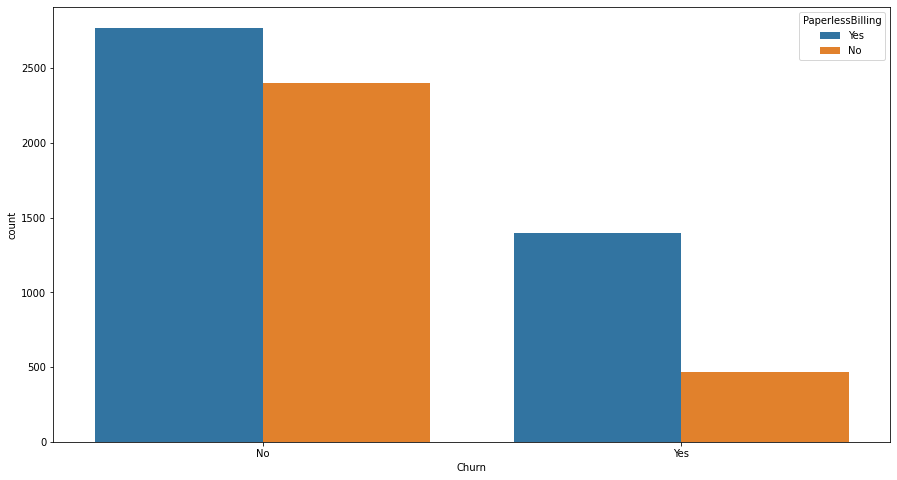

In [370]:
#plt.figure(figsize=[15,8])
sns.countplot(x=df['Churn'],hue=df['PaperlessBilling'],data=df)

In [371]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [372]:
((df['PaperlessBilling']=='No')&(df['Churn']=='Yes')).value_counts()

False    6574
True      469
dtype: int64

### 26.7% of Customer who has phone service leave
### 24.93% of customer who has not phone service leave

<AxesSubplot:xlabel='Churn', ylabel='count'>

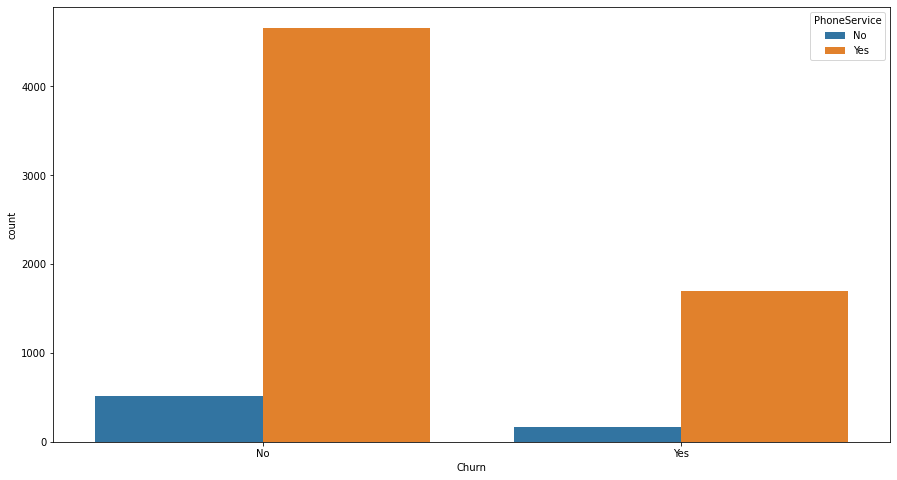

In [373]:
plt.figure(figsize=[15,8])
sns.countplot(x=df['Churn'],hue=df['PhoneService'],data=df)

In [374]:
((df['PhoneService']=='No')&(df['Churn']=='Yes')).value_counts()

False    6873
True      170
dtype: int64

### Customer has higher monthly charges are more likly to churn 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

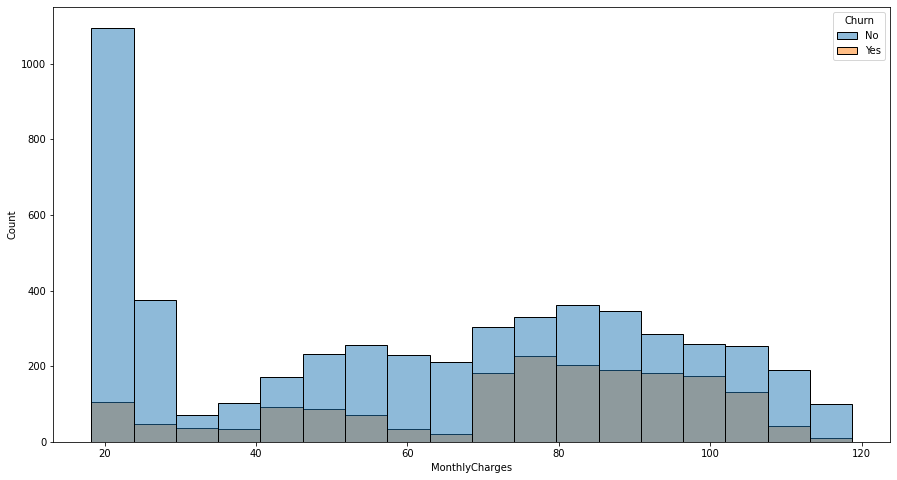

In [375]:
plt.figure(figsize=[15,8])
sns.histplot(x=df['MonthlyCharges'],hue=df['Churn'])

In [376]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

### Customers who stayed with the company for longer time are more less likely to churn now.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

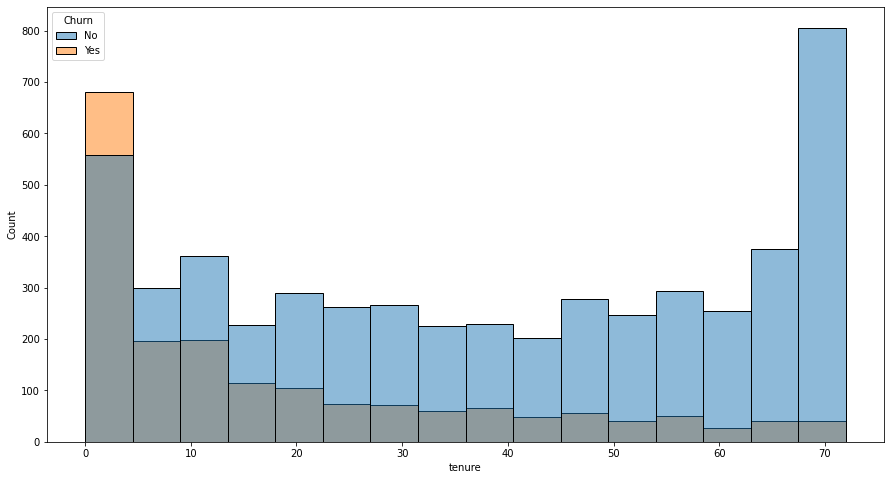

In [377]:
plt.figure(figsize=[15,8])
sns.histplot(x=df['tenure'],hue=df['Churn'])

## Preproccesing

### We have no outliers

<AxesSubplot:xlabel='tenure'>

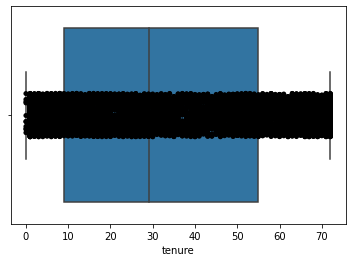

In [378]:
sns.boxplot(x=df['tenure'],data=df)
sns.stripplot(x=df['tenure'],color='black')

In [379]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<AxesSubplot:xlabel='TotalCharges'>

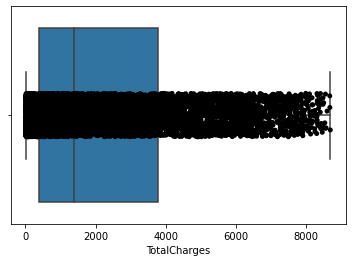

In [381]:
sns.boxplot(x=df['TotalCharges'],data=df)
sns.stripplot(x=df['TotalCharges'],color='black')

<AxesSubplot:xlabel='MonthlyCharges'>

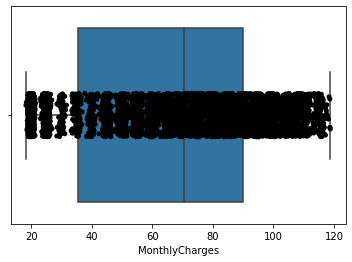

In [382]:
sns.boxplot(x=df['MonthlyCharges'],data=df)
sns.stripplot(x=df['MonthlyCharges'],color='black')

### split into input and output

In [383]:
x=df.drop(columns='Churn')
y=df['Churn']

In [384]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [385]:
Encode={'Yes':1,'No':0}
y=y.map(Encode)

In [386]:
x = pd.get_dummies(x,drop_first=True)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


### Split into train and test

In [387]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,stratify=y,test_size=0.2)

In [388]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0,41,70.20,2894.55,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5807,0,57,18.80,1094.35,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
5118,0,42,85.90,3729.75,0,1,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
275,0,5,85.40,401.10,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1350,0,67,65.65,4322.85,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,29,55.25,1620.20,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
1954,0,1,75.45,75.45,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
525,0,52,91.25,4738.30,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5748,0,21,99.85,1992.55,0,0,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0


### handle Imbalanced data

In [389]:
from imblearn.over_sampling import SMOTE
over_sample=SMOTE()
x_train_sampled , y_train_sampled=over_sample.fit_resample(x_train,y_train)


In [391]:
x_train_sampled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,41,70.200000,2894.550000,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,57,18.800000,1094.350000,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
2,0,42,85.900000,3729.750000,0,1,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0,5,85.400000,401.100000,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,0,67,65.650000,4322.850000,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,0,4,91.490949,417.561753,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
8274,0,1,30.084142,30.084142,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8275,0,1,69.501438,69.501438,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8276,0,19,92.848377,1842.834307,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [396]:
y_train_sampled.value_counts()

0    4139
1    4139
Name: Churn, dtype: int64

### Feature Scaling

In [397]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_sampled)
x_test_scaled=scaler.transform(x_test)

In [398]:
x_train_scaled=pd.DataFrame(x_train_scaled)
x_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.397397,0.572625,0.094190,0.407663,1.156329,-0.771555,1.932095,0.345331,-0.294826,-0.784158,...,-0.441822,1.371608,-0.441822,-0.742725,2.415714,-0.443383,-1.223267,-0.429654,-0.727517,2.135284
1,-0.397397,1.245978,-1.698530,-0.428427,1.156329,-0.771555,-0.517573,0.345331,-0.294826,-0.784158,...,2.263356,-0.729071,2.263356,-0.742725,-0.413956,2.255386,-1.223267,2.327457,-0.727517,-0.468322
2,-0.397397,0.614710,0.641772,0.795565,-0.864805,1.296083,-0.517573,0.345331,-0.294826,1.275253,...,-0.441822,-0.729071,-0.441822,-0.742725,-0.413956,-0.443383,0.817483,2.327457,-0.727517,-0.468322
3,-0.397397,-0.942418,0.624333,-0.750403,1.156329,1.296083,-0.517573,0.345331,-0.294826,1.275253,...,-0.441822,-0.729071,-0.441822,-0.742725,-0.413956,-0.443383,0.817483,-0.429654,1.374538,-0.468322
4,-0.397397,1.666823,-0.064504,1.071027,-0.864805,1.296083,-0.517573,0.345331,-0.294826,1.275253,...,-0.441822,-0.729071,-0.441822,-0.742725,-0.413956,2.255386,-1.223267,-0.429654,-0.727517,2.135284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,-0.397397,-0.984503,0.836772,-0.742757,-0.864805,-0.771555,-0.517573,0.345331,-0.294826,-0.784158,...,-0.441822,1.371608,-0.441822,-0.742725,-0.413956,-0.443383,0.817483,-0.429654,-0.727517,-0.468322
8274,-0.397397,-1.110756,-1.304964,-0.922718,-0.864805,-0.771555,-0.517573,-2.895771,3.391833,-0.784158,...,-0.441822,-0.729071,-0.441822,-0.742725,-0.413956,-0.443383,-1.223267,-0.429654,-0.727517,-0.468322
8275,-0.397397,-1.110756,0.069826,-0.904411,1.156329,-0.771555,-0.517573,0.345331,-0.294826,-0.784158,...,-0.441822,-0.729071,-0.441822,-0.742725,-0.413956,-0.443383,0.817483,-0.429654,-0.727517,-0.468322
8276,-0.397397,-0.353235,0.884116,-0.080799,-0.864805,-0.771555,-0.517573,0.345331,-0.294826,1.275253,...,-0.441822,-0.729071,-0.441822,-0.742725,-0.413956,-0.443383,-1.223267,-0.429654,-0.727517,-0.468322


In [399]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train_sampled)
y_pred = lr.predict(x_test_scaled)

In [400]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409

